# Análise dos dados referentes as eleições no Rio Grande do Norte (2016)

Análise dos dados de todas as eleições no estado do RN até o ano de 2016.

Dataset obtido pela https://brasil.io/. 

In [8]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#Lendo o dataset

eleicoes = pd.read_csv(('files/eleicoes-rn.csv'),sep=',')
eleicoes.head(5)


,ano_eleicao,sigla_uf,descricao_ue,num_turno,descricao_cargo,sigla_partido,descricao_sexo,cpf_candidato,data_nascimento,numero_candidato,nome_candidato,nome_urna_candidato,des_situacao_candidatura,desc_sit_tot_turno
0,2016,RN,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,PSB,MASCULINO,***00641***,11/02/1983,40.0,FRANCISCO MACEDO DA SILVA,INÁCIO MACEDO,DEFERIDO,NÃO ELEITO
1,2016,RN,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,PSDB,FEMININO,***37030***,16/10/1972,45.0,SUELEIDE DE MORAIS ARAUJO,SUELEIDE,DEFERIDO COM RECURSO,ELEITO
2,2016,RN,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,SD,MASCULINO,***77445***,11/07/1977,77.0,SILVÉRIO GILIARDE DA COSTA,GILIARDE,DEFERIDO,NÃO ELEITO
3,2016,RN,TENENTE LAURENTINO CRUZ,1.0,VEREADOR,DEM,FEMININO,***68725***,30/05/1977,25222.0,MARIA DAS DORES IBIAPINO,MARIA DE VALMIR,DEFERIDO,SUPLENTE
4,2016,RN,TENENTE LAURENTINO CRUZ,1.0,VEREADOR,DEM,FEMININO,***10341***,06/02/1972,25333.0,MIRIAM AGOSTINHO DE OLIVEIRA,MIRIAM AGOSTINHO,DEFERIDO,SUPLENTE


In [19]:
#Tratando os dados (Removendo as colunas do dataset que não serão utilizadas)

eleicoes =  eleicoes.drop(columns=['cpf_candidato','numero_candidato','nome_urna_candidato',
                                  'des_situacao_candidatura','sigla_uf'])
eleicoes.head(5)

,ano_eleicao,descricao_ue,num_turno,descricao_cargo,sigla_partido,descricao_sexo,data_nascimento,nome_candidato,desc_sit_tot_turno
0,2016,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,PSB,MASCULINO,11/02/1983,FRANCISCO MACEDO DA SILVA,NÃO ELEITO
1,2016,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,PSDB,FEMININO,16/10/1972,SUELEIDE DE MORAIS ARAUJO,ELEITO
2,2016,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,SD,MASCULINO,11/07/1977,SILVÉRIO GILIARDE DA COSTA,NÃO ELEITO
3,2016,TENENTE LAURENTINO CRUZ,1.0,VEREADOR,DEM,FEMININO,30/05/1977,MARIA DAS DORES IBIAPINO,SUPLENTE
4,2016,TENENTE LAURENTINO CRUZ,1.0,VEREADOR,DEM,FEMININO,06/02/1972,MIRIAM AGOSTINHO DE OLIVEIRA,SUPLENTE


### Analisando os dados (Sexo) 

O primeiro estudo será:
- Quantidade de homens e mulheres candidatos no ano de 2016;
- Quantidade de mulheres e homens eleitos no ano de 2016;
- Quantidade de mulheres e homens não eleitos no ano de 2016.

In [48]:
#Filtrando todos os candidatos do ano de 2016

eleicoes_2016 = eleicoes[eleicoes.ano_eleicao.isin([2016])]
eleicoes_2016.head(5)

,ano_eleicao,descricao_ue,num_turno,descricao_cargo,sigla_partido,descricao_sexo,data_nascimento,nome_candidato,desc_sit_tot_turno
0,2016,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,PSB,MASCULINO,11/02/1983,FRANCISCO MACEDO DA SILVA,NÃO ELEITO
1,2016,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,PSDB,FEMININO,16/10/1972,SUELEIDE DE MORAIS ARAUJO,ELEITO
2,2016,TENENTE LAURENTINO CRUZ,1.0,PREFEITO,SD,MASCULINO,11/07/1977,SILVÉRIO GILIARDE DA COSTA,NÃO ELEITO
3,2016,TENENTE LAURENTINO CRUZ,1.0,VEREADOR,DEM,FEMININO,30/05/1977,MARIA DAS DORES IBIAPINO,SUPLENTE
4,2016,TENENTE LAURENTINO CRUZ,1.0,VEREADOR,DEM,FEMININO,06/02/1972,MIRIAM AGOSTINHO DE OLIVEIRA,SUPLENTE


In [76]:
#Quantidade de homens e mulheres CANDIDATOS no ano de 2016

candidatos = eleicoes_2016.groupby(['descricao_sexo']).count()
print(candidatos['ano_eleicao'])

descricao_sexo
FEMININO     2965
MASCULINO    6165
Name: ano_eleicao, dtype: int64


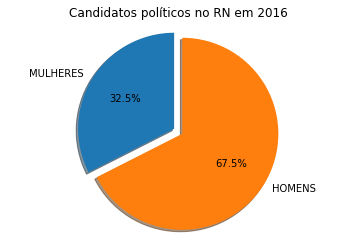

In [92]:
# Exibindo no gráfico os valores

labels = ['MULHERES','HOMENS']
sizes = [candidatos['ano_eleicao']['FEMININO'],candidatos['ano_eleicao']['MASCULINO']]


# only "explode" the 2nd slice (i.e. 'MULHERES')
explode = (0.1, 0)  

fig1 , ax1 = plt.subplots()
ax1.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')
plt.title('Candidatos políticos no RN em 2016')
plt.show()

In [90]:
#Quantidade de homens e mulheres ELEITOS no ano de 2016
eleitos_2016 = eleicoes_2016[eleicoes_2016.desc_sit_tot_turno.isin(['ELEITO'])]
candidatos_eleitos = eleitos_2016.groupby(['descricao_sexo']).count()
print(candidatos_eleitos['ano_eleicao'])

descricao_sexo
FEMININO      94
MASCULINO    242
Name: ano_eleicao, dtype: int64


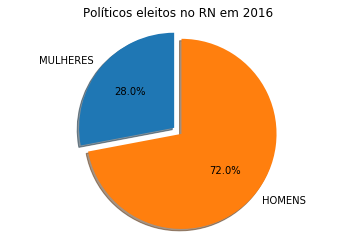

In [93]:
# Exibindo no gráfico os valores

labels = ['MULHERES','HOMENS']
sizes = [candidatos_eleitos['ano_eleicao']['FEMININO'],candidatos_eleitos['ano_eleicao']['MASCULINO']]


# only "explode" the 2nd slice (i.e. 'MULHERES')
explode = (0.1, 0)  

fig2 , ax2 = plt.subplots()
ax2.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax2.axis('equal')
plt.title('Políticos eleitos no RN em 2016')
plt.show()

In [94]:
#Quantidade de homens e mulheres NÃO ELEITOS no ano de 2016
nao_eleitos_2016 = eleicoes_2016[eleicoes_2016.desc_sit_tot_turno.isin(['NÃO ELEITO'])]
candidatos_nao_eleitos = nao_eleitos_2016.groupby(['descricao_sexo']).count()
print(candidatos_nao_eleitos['ano_eleicao'])

descricao_sexo
FEMININO      431
MASCULINO    1015
Name: ano_eleicao, dtype: int64


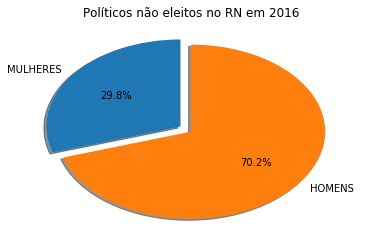

In [95]:
# Exibindo no gráfico os valores

labels = ['MULHERES','HOMENS']
sizes = [candidatos_nao_eleitos['ano_eleicao']['FEMININO'],candidatos_nao_eleitos['ano_eleicao']['MASCULINO']]

# only "explode" the 2nd slice (i.e. 'MULHERES')
explode = (0.1, 0)  

fig3 , ax3 = plt.subplots()
ax3.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax2.axis('equal')
plt.title('Políticos não eleitos no RN em 2016')
plt.show()

### Analisando os dados (Partidos)

O segundo estudo será:
- Quantidade de políticos de cada partido;
- Quantidade de políticos eleitos por partido;
- Quantidade de políticos não eleitos por partido.

In [119]:
#Quantidade de políticos no ano de 2016 por partido
partidos = eleicoes_2016.groupby(['sigla_partido']).count()

#Ordenando a quantidade de políticos por partidos
print(sorted(partidos['ano_eleicao'],reverse=True))


[1274, 1144, 507, 483, 471, 433, 417, 380, 372, 321, 298, 293, 290, 270, 220, 219, 189, 187, 180, 180, 158, 146, 130, 120, 119, 102, 93, 49, 30, 28, 22, 5]


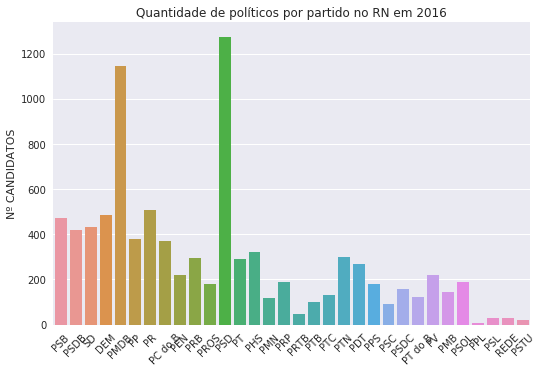

In [120]:
# Exibindo os valores no gráfico (TODOS OS CANDIDATOS- POR PARTIDOS)

sns.set(font_scale=1)
grafico = sns.factorplot("sigla_partido", data=eleicoes_2016, kind="count",size=5, aspect=1.5)
grafico.set_xticklabels(rotation=45)
plt.title('Quantidade de políticos por partido no RN em 2016')
plt.xlabel('')
plt.ylabel('Nº CANDIDATOS')
plt.show()



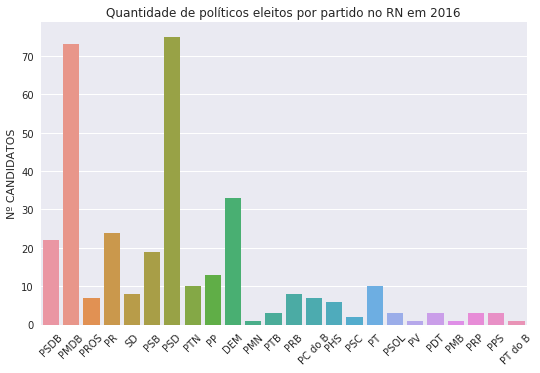

In [122]:
# Exibindo os valores no gráfico (ELEITOS  - POR PARTIDOS)

sns.set(font_scale=1)
grafico = sns.factorplot("sigla_partido", data=eleitos_2016, kind="count",size=5, aspect=1.5)
grafico.set_xticklabels(rotation=45)
plt.title('Quantidade de políticos eleitos por partido no RN em 2016')
plt.xlabel('')
plt.ylabel('Nº CANDIDATOS')
plt.show()


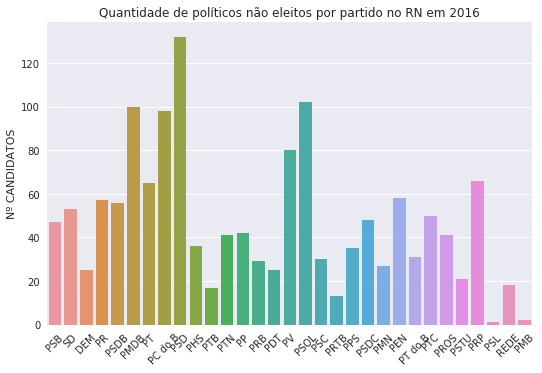

In [123]:
# Exibindo os valores no gráfico (NÃO ELEITOS  - POR PARTIDOS)

sns.set(font_scale=1)
grafico = sns.factorplot("sigla_partido", data=nao_eleitos_2016, kind="count",size=5, aspect=1.5)
grafico.set_xticklabels(rotation=45)
plt.title('Quantidade de políticos não eleitos por partido no RN em 2016')
plt.xlabel('')
plt.ylabel('Nº CANDIDATOS')
plt.show()